<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/UTS/Irawan_Mardiansyah_UTS_Gcolab_kNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Irawan Mardiansyah

NIM: 1103210174

Kelas: TK4504

Tugas: UTS

Dataset: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

Model: k-Nearest Neighbors

Dokumentasi GPT: https://chat.openai.com/share/406f42ec-049e-499d-93fa-b47b04451391

# Menghubungkan Goggle Colab & Google Drive

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Library

In [95]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Membaca Data

In [68]:
# Baca file .csv dari GDrive
train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv', dtype={'Column26': str})

# Tampilkan baris dari dataframe 'train'
train.head()

<ipython-input-68-e8db14492279>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv', dtype={'Column26': str})


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Konversi Ke Integer

In [70]:
# Mengisi nilai yang hilang dengan 0 dan mengubahnya menjadi integer
train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

# Menghapus karakter non-numerik dan mengubahnya menjadi float
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Mengganti underscore dengan NaN, mengisi nilai yang hilang dengan 0
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan).astype(float).fillna(0)

# Menghapus karakter non-numerik, mengubahnya menjadi float, dan mengisi nilai yang hilang dengan 0
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True).astype(float).fillna(0)

# Mengganti string kosong dengan '0', menghapus karakter non-numerik dan garis bawah ganda, mengubahnya menjadi float, dan mengisi nilai yang hilang dengan 0
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0').str.replace(r'[^0-9.]|__', '', regex=True).astype(float).fillna(0)

# Menghapus karakter non-numerik dan garis bawah ganda, mengubahnya menjadi float, dan mengisi nilai yang hilang dengan 0
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]|__', '', regex=True).astype(float).fillna(0)

# Fungsi untuk mengubah rentang umur kredit menjadi bulan
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

# Mengaplikasikan fungsi untuk menghitung umur kredit dalam bulan
train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

# Data Format & Duplicates

In [71]:
# Cari duplikat menggunakan metode duplicated()
duplikat_data = train[train.duplicated()]

# Hitung jumlah baris yang duplikat dengan menggunakan shape[0]
jumlah_duplikat = duplikat_data.shape[0]

# Lakukan pengujian kondisional
if jumlah_duplikat == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print("Ditemukan", jumlah_duplikat, "duplikat.")

Tidak ada duplikat yang ditemukan.


# Scalling Data

In [72]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.195097e+02,6.847573e+02,1.400000e+01,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,1.076196e+01,6.178993e+01,0.000000e+00,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,2.877941e+01,2.181148e+02,0.000000e+00,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,1.017179e+01,6.880628e+00,-6.490000e+00,4.970000,9.250000,14.660000,3.697000e+01


In [73]:
# Pilih kolom tertentu
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

# Tentukan persentil untuk setiap kolom yang dipilih
percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

# Hapus perulangan nilai untuk setiap kolom yang masih diatas persentil yang ditentukan sebelumnya
for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

In [74]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85806.0,1.204860e+02,6.900675e+02,1.400000e+01,25.000000,34.000000,42.000000,8698.000000
Annual_Income,85806.0,4.937862e+04,3.647839e+04,7.005930e+03,19294.460000,36780.030000,70825.760000,166837.640000
Monthly_Inhand_Salary,72894.0,4.105781e+03,3.036319e+03,3.036454e+02,1623.778333,3069.091667,5899.970000,14131.123333
Num_Bank_Accounts,85806.0,5.372759e+00,2.585031e+00,-1.000000e+00,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,85806.0,5.779048e+00,5.727016e+00,0.000000e+00,4.000000,5.000000,7.000000,171.000000
Interest_Rate,85806.0,1.455117e+01,8.824173e+00,1.000000e+00,7.000000,13.000000,20.000000,128.000000
Num_of_Loan,85806.0,7.318381e+00,1.888167e+01,0.000000e+00,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,85806.0,2.103348e+01,1.478622e+01,-5.000000e+00,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,85806.0,1.234832e+01,6.845002e+00,0.000000e+00,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,85806.0,1.018960e+01,6.867078e+00,-6.490000e+00,4.990000,9.280000,14.710000,36.970000


# Filtering

In [75]:
# Menghapus entri '!@9#%8' dari kolom Payment_Behaviour
train = train[train['Payment_Behaviour'] != '!@9#%8']

# Menghapus entri '_______' dari kolom Occupation
train = train[train['Occupation'] != '_______']

# Menampilkan nilai unik dari kolom Occupation setelah penghapusan dilakukan
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [76]:
# Filter kolom 'Payment_Behaviour' untuk menghapus nilai '!@9#%8'
train = train[train['Payment_Behaviour'] != '!@9#%8']

# Filter kolom 'Occupation' untuk menghapus nilai '_______'
train = train[train['Occupation'] != '_______']

# Mencetak nilai unik dari kolom 'Occupation' setelah penghapusan dilakukan
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [77]:
# Buat dataframe baru pada Credit_Mix yang tidak berisi nilai '_'
train_cleaned = train[train['Credit_Mix'] != '_']

# Tampilkan nilai-nilai unik dari kolom Credit_Mix yang telah dibersihkan
print(train_cleaned['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


# Negative Values

In [78]:
# Seleksi kolom untuk filtering
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Lakukan perulangan untuk selain kurang dari 0 dihapus dari dataframe
for column in selected_columns:
    train = train[train[column] >= 0]

In [79]:
# Drop daftar yang diinginkan
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

# Drop columns tersebut
train.drop(columns=columns_to_drop, inplace=True)

# Missing Values

In [81]:
# Cek apakah ada data yang kosong dalam dataframe
if train.isnull().sum().sum() == 0:
    print("Tidak ada data yang kosong")
else:
    print("Jumlah data yang kosong:", train.isnull().sum().sum())

Tidak ada data yang kosong


# Feature Engineering

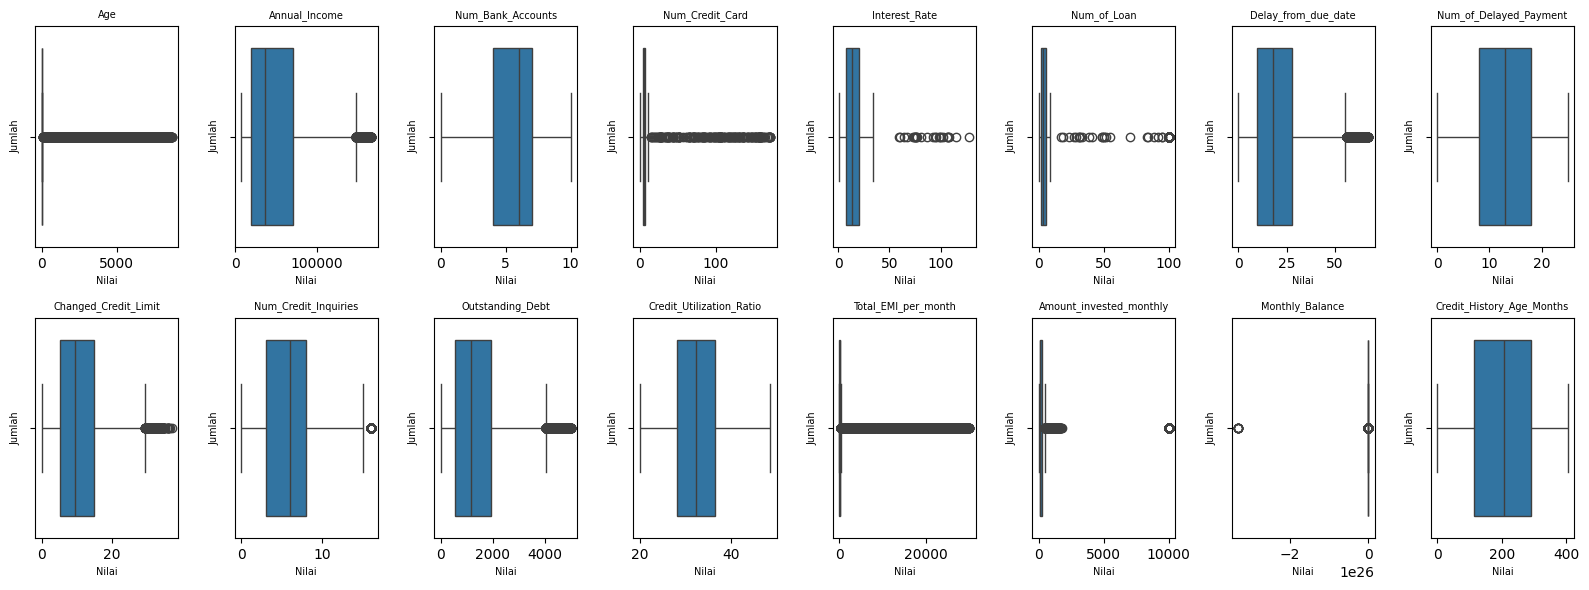

In [82]:
# Pilih kolom-kolom numerik dari dataset pelatihan
kolom_numerik = train.select_dtypes(include=['int64', 'float64']).columns

# Tentukan jumlah kolom yang akan ditampilkan dalam satu baris
jumlah_kolom = 8

# Hitung jumlah baris yang diperlukan untuk menampilkan semua kolom
jumlah_baris = (len(kolom_numerik) + jumlah_kolom - 1) // jumlah_kolom

# Buat gambar subplot dengan ukuran yang sesuai
fig, axes = plt.subplots(jumlah_baris, jumlah_kolom, figsize=(16, 6))

# Ratakan array dari subplot menjadi satu dimensi
axes = axes.flatten()

# Loop melalui setiap kolom numerik untuk membuat boxplot
for i, kolom in enumerate(kolom_numerik):
    sns.boxplot(x=train[kolom], ax=axes[i])
    axes[i].set_title(kolom, fontsize=7)
    axes[i].set_xlabel('Nilai', fontsize=7)
    axes[i].set_ylabel('Jumlah', fontsize=7)

# Sembunyikan subplot yang tidak digunakan
for j in range(len(kolom_numerik), jumlah_kolom * jumlah_baris):
    axes[j].axis('off')

# Atur ulang tata letak plot agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()


# Scaling

In [83]:
# Tune scale pada tiap kolom
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

# Encoding

In [87]:
# Label Encoding for Credit Score
credit_score_categories = ['Poor', 'Standard', 'Good']
credit_score_encoder = OrdinalEncoder(categories=[credit_score_categories])
train['Credit_Score_Encoded'] = credit_score_encoder.fit_transform(train[['Credit_Score']])

# Label Encoding for Occupation
occupation_label_encoder = LabelEncoder()
train['Occupation_Encoded'] = occupation_label_encoder.fit_transform(train['Occupation'])

# Ordinal Encoding for Credit Mix
credit_mix_categories = ['Bad', 'Standard', 'Good']
credit_mix_encoder = OrdinalEncoder(categories=[credit_mix_categories])
print(train['Credit_Mix'].unique())


# Ordinal Encoding for Payment Behaviour
payment_behaviour_categories = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]
payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])
train['Payment_Behaviour_Encoded'] = payment_behaviour_encoder.fit_transform(train[['Payment_Behaviour']])

# Dropping Columns that were Encoded
columns_to_drop = ['Payment_Behaviour', 'Credit_Mix', 'Occupation', 'Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)


['_' 'Good' 'Standard' 'Bad']


# New Features

In [88]:
# Calculate total number of accounts (Bank Accounts + Credit Cards)
train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Calculate total debt per account
train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Calculate debt-to-income ratio
train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Calculate total number of delayed payments per account
train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Calculate total monthly expenses (EMI + Monthly Investments)
train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']

# Mutual Information Scores (MI Score)​

In [92]:
# Identifikasi kolom-kolom kategorikal dalam DataFrame 'train'
categorical_columns = train.select_dtypes(include=['object']).columns

# Buat duplikat data 'train' untuk proses encoding
data_encoded = train.copy()

# Buat encoder Ordinal
encoder = OrdinalEncoder()

# Terapkan encoding pada kolom-kolom kategorikal menggunakan encoder Ordinal
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

# Pisahkan target (y) dan fitur-fitur (X) dari data yang telah diencode
y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

# Hitung skor informasi mutual antara setiap fitur dalam X dan target y
skor_mi = mutual_info_classif(X, y)

# Tampilkan skor informasi mutual untuk setiap fitur
for i, skor in enumerate(skor_mi):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {skor}")

Feature 'Age': Mutual Information Score = 0.009976909204506113
Feature 'Annual_Income': Mutual Information Score = 0.49621325075183353
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.06212816101359708
Feature 'Num_Credit_Card': Mutual Information Score = 0.06865971162048012
Feature 'Interest_Rate': Mutual Information Score = 0.10296662086366637
Feature 'Num_of_Loan': Mutual Information Score = 0.018740222865910594
Feature 'Delay_from_due_date': Mutual Information Score = 0.06923770773614235
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.0528210260752342
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.1086245802755359
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.03212325815869255
Feature 'Outstanding_Debt': Mutual Information Score = 0.49470073466262154
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07755694803666047
Feature 'Total_EMI_per_month': Mutu

# Machine Learning Models k-Nearest Neighbors

In [ ]:
# Persiapkan sebuah dataframe untuk melatih model pada variabel "y" yang terdapat dalam kolom "Credit_Score_Encoded".
y = train['Credit_Score_Encoded']

# Sediakan dataframe untuk melatih model pada variabel "X" yang terdapat dalam kolom-kolom yang telah ditentukan di bawah.
X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

# Bagi dataset menjadi dua bagian, yaitu data latih dan data uji.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Model Evaluation

In [99]:
# Memuat dataset Iris
iris = load_iris()
X = iris.data  # Fitur-fitur
y = iris.target  # Label

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model kNN
k = 3  # Jumlah tetangga yang akan dipertimbangkan
knn = KNeighborsClassifier(n_neighbors=k)

# Melatih model kNN
knn.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi kNN:", accuracy)

Akurasi kNN: 1.0


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


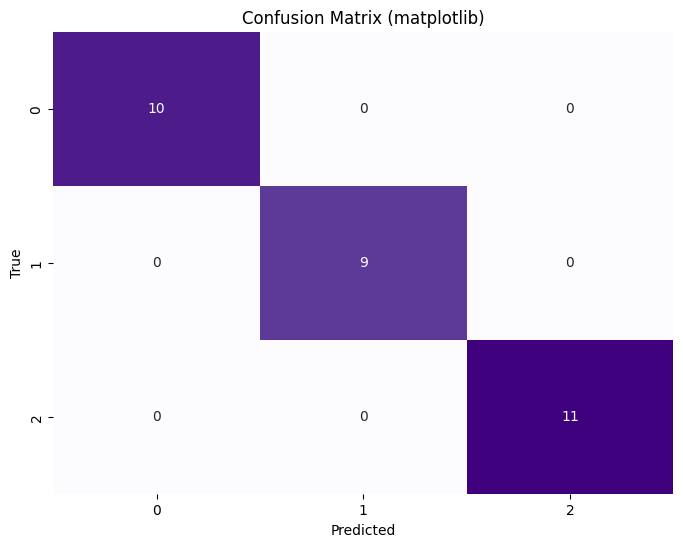

In [113]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualisasi confusion matrix menggunakan matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (matplotlib)')
plt.show()